# Introduction to Dimensionality Reduction with PCA
Principal Component Analysis

In [1]:
%pylab inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sklearn
import IPython
import platform

from sklearn import datasets
from sklearn.decomposition import PCA
iris = datasets.load_iris()

remove_setosa = False

if remove_setosa:
    indices_no_setosa = (iris.target != 0) #[TRUE for non-setosa else FALSE]
    X_iris = iris.data[indices_no_setosa]
    y_iris = iris.target[indices_no_setosa]
else:
    X_iris = iris.data
    y_iris = iris.target

numpy.set_printoptions(precision=4)

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
# Test set will be the 25% taken randomly
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.10, random_state=33)

colormarkers = [ ['red','s'], ['greenyellow','o'], ['blue','x']]

# Scale the features
scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<Figure size 432x288 with 0 Axes>

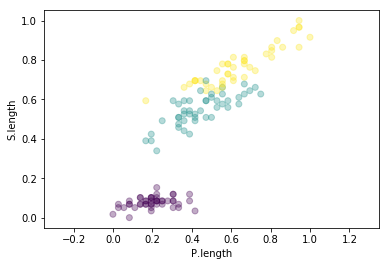

In [3]:
px,py = X_train[:,0], X_train[:,2]

fig = plt.figure()
ax = plt.figure().gca()
ax.axis("equal")

ax.scatter(px,py, alpha=0.33, c=y_train)
ax.set_xlabel('P.length')
ax.set_ylabel('S.length')
plt.show()

Our PCA scale factors and direction vectors are:
0.13360019492062306 [0.5949 0.8038]
0.008729127220653237 [-0.8038  0.5949]


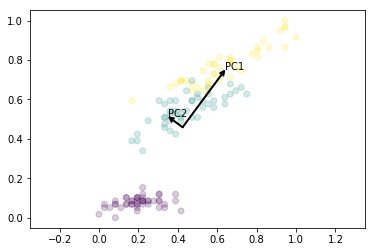

Replot, with rotated X,y values,
And project points onto PC1:


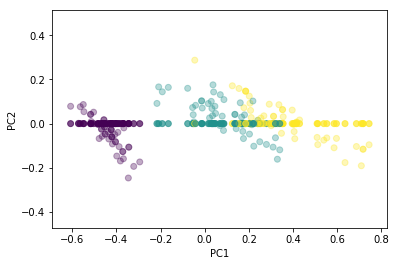

PC1 explains 93.87%
PC2 explains 6.13%


In [4]:
clf_PCA = PCA(n_components=2)
txd = clf_PCA.fit_transform(X_train[:,[0,2]])

def draw_vector(j, v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)
    ax.annotate("PC{}".format(1+j), v1)

# plot data
px,py = X_train[:,0],X_train[:,2] 
fig = plt.figure()
ax = fig.gca()
plt.axis("equal")
plt.scatter(px,py, alpha=0.2, c=y_train)
print("Our PCA scale factors and direction vectors are:")
for i, (length, vector) in enumerate(zip(clf_PCA.explained_variance_, clf_PCA.components_)):
    print(length, vector)
    v = vector * np.sqrt(length)
#     print(v)
    draw_vector(i, clf_PCA.mean_, clf_PCA.mean_ + v)
plt.show()

print("Replot, with rotated X,y values,")
print("And project points onto PC1:")
px, py = txd[:,0], txd[:,1]
fig = plt.figure()
ax = fig.gca()
plt.axis("equal")
ax.scatter(px,py, alpha=0.33, c=y_train)
ax.scatter(px,[0 for p in px], alpha=0.7, c=y_train)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.show()

for i,xv in enumerate(clf_PCA.explained_variance_ratio_):
    print("PC{} explains {:.2f}%".format(1+i,xv*100))

## Singular Value Decomposition of the Covariance Matrix
Underneath the sklearn wrapper, PCA is doing SVD on the Covariance Matrix of our features.  Here we do the same steps ourselves.  Compare the U,S,V values to the scale and direction values in the section above.  They should match.

(135, 2)
Numpy cov:
 [[0.0529 0.0597]
 [0.0597 0.0894]]


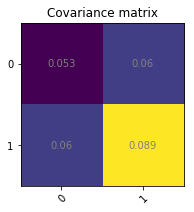

U matrix (PC directions)
[[-0.5949 -0.8038]
 [-0.8038  0.5949]]

S(igma) matrix (scale values)
[0.1336 0.0087]

V matrix (same as U)
[[-0.5949 -0.8038]
 [-0.8038  0.5949]]


In [5]:
M = X_train[:,[0,2]]
print(M.shape)

covariance_mx = numpy.cov(M.T)
print("Numpy cov:\n",covariance_mx)

# Do not confuse the covariance matrix with the correlation matrix!
# corr_mx = numpy.corrcoef(M.T)
# print("Numpy corr:\n",corr_mx)

fig, ax = plt.subplots()
im = ax.imshow(covariance_mx)

# # We want to show all ticks...
ax.set_xticks(np.arange(len(covariance_mx)))
ax.set_yticks(np.arange(len(covariance_mx)))

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(covariance_mx.shape[0]):
    for j in range(covariance_mx.shape[0]):
        text = ax.text(j, i, round(covariance_mx[i, j],3),
                       ha="center", va="center", color="grey")

ax.set_title("Covariance matrix")
# fig.tight_layout()
fig.set_size_inches(3,3)
plt.show()

U,S,V = sp.linalg.svd(covariance_mx)
print("U matrix (PC directions)")
print(U)
print("\nS(igma) matrix (scale values)")
print(S)
print("\nV matrix (same as U)")
print(V)

## Scree plot
Now we compress the full set of Iris data (4 components) using PCA.
We use the output to create a scree plot which can be used to select an appropriate dimensionality reduction.

[[ 0.4235 -0.1693  0.62    0.6385]
 [ 0.4473  0.8933 -0.0386 -0.0224]
 [-0.6991  0.363  -0.0553  0.6136]
 [ 0.3632 -0.2041 -0.7817  0.4641]]


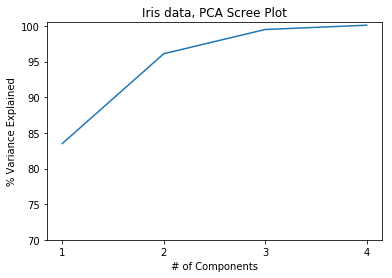

In [6]:
clf_PCA = PCA(n_components=4)
clf_PCA.fit(X_train)

cmps = clf_PCA.components_
print(cmps)

variance = clf_PCA.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(clf_PCA.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

ax = plt.figure().gca()
plt.ylabel('% Variance Explained')
plt.xlabel('# of Components')
plt.title('Iris data, PCA Scree Plot')
plt.ylim(70,100.5)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.plot([1,2,3,4],var)

## Higher dimensioned datasets
Now we do some PCA and scree plots with the wine (13D) and Boston (14D if we include price) datasets.

(178, 13) (178,)


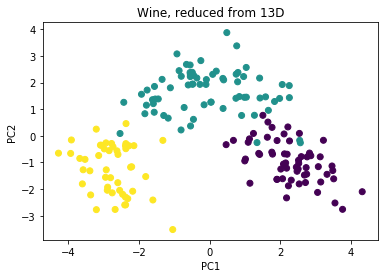

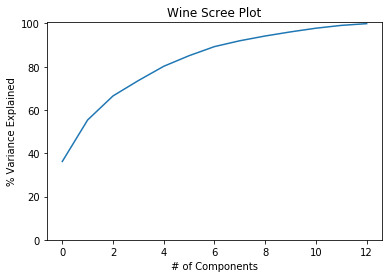

In [7]:
wine = sklearn.datasets.load_wine()
# X = sklearn.preprocessing.scale(wine.data)
scaler = sklearn.preprocessing.StandardScaler()
X = wine.data
y = wine.target

X = scaler.fit_transform(X)

print(X.shape, y.shape)

k = X.shape[1]
clf_PCA = PCA(n_components=k)
txd = clf_PCA.fit_transform(X)

plt.scatter(txd[:,0], txd[:,1], c=y)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Wine, reduced from 13D")
plt.show()
variance = clf_PCA.explained_variance_ratio_ #calculate variance ratios
var=np.cumsum(np.round(clf_PCA.explained_variance_ratio_, decimals=3)*100)
ax = plt.figure().gca()
plt.ylabel('% Variance Explained')
plt.xlabel('# of Components')
plt.title('Wine Scree Plot')
plt.ylim(0,100.5)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.plot(list(range(k)),var)

(506, 14) (506,)


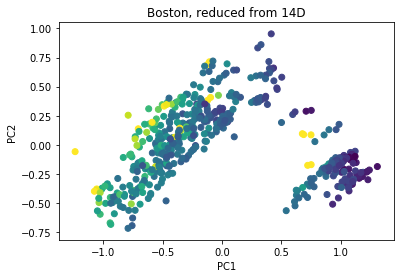

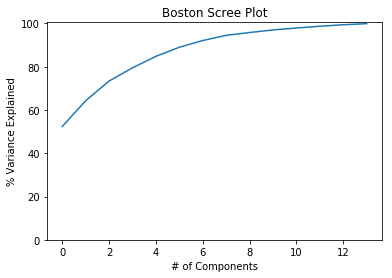

In [8]:
boston = sklearn.datasets.load_boston()
X = boston.data
y = boston.target
mms = sklearn.preprocessing.MinMaxScaler()
X = mms.fit_transform(numpy.c_[X,y])
# X = mms.fit_transform(X)
print(X.shape, y.shape)

k = X.shape[1]
clf_PCA = PCA(n_components=k)
txd = clf_PCA.fit_transform(X)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(111)

ax.scatter(txd[:,0], txd[:,1], c=y)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Boston, reduced from 14D")
plt.show()
variance = clf_PCA.explained_variance_ratio_ #calculate variance ratios
var=np.cumsum(np.round(clf_PCA.explained_variance_ratio_, decimals=3)*100)
ax = plt.figure().gca()
plt.ylabel('% Variance Explained')
plt.xlabel('# of Components')
plt.title('Boston Scree Plot')
plt.ylim(0,100.5)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.plot(list(range(k)),var)